<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions. 
Find t

## Actual Question
Choose the **one** question that should be answered.

## Actual Question
### Predicting whether the patient has cancer or not?

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [38]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import requests

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [39]:
path = r'C:\Users\Vinitha\Desktop\IOD\DATA\breast-cancer-wisconsin-data-old.csv'
df = pd.read_csv(path)

In [40]:
df.head()

,Sample_number,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [41]:
df['Class'] = df['Class'].replace({2:0,4:1})

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_number                699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Cell_Size_Uniformity         699 non-null    int64 
 3   Cell_Shape_Uniformity        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [43]:
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [44]:
df.replace('?', np.nan, inplace=True)

In [45]:
df = df.drop('Sample_number', axis=1)

In [46]:
df= df.dropna()

In [47]:
df.dtypes

Clump_Thickness                 int64
Cell_Size_Uniformity            int64
Cell_Shape_Uniformity           int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [48]:
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

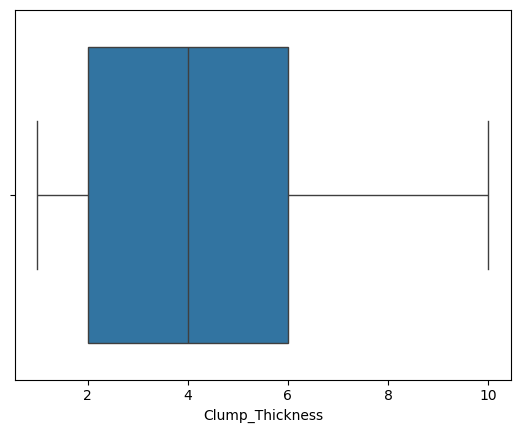

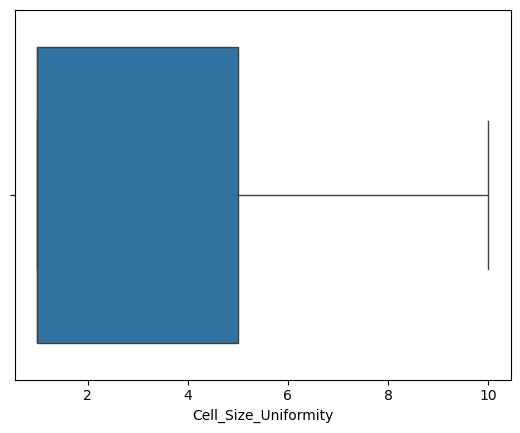

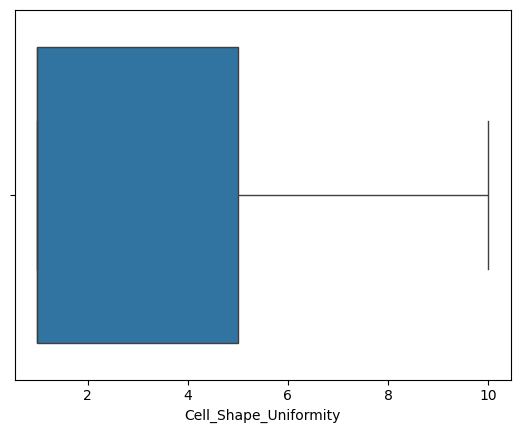

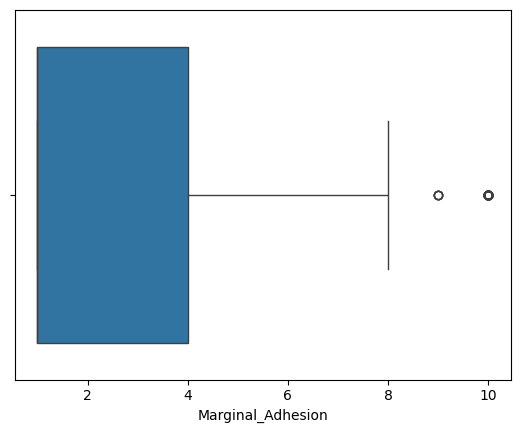

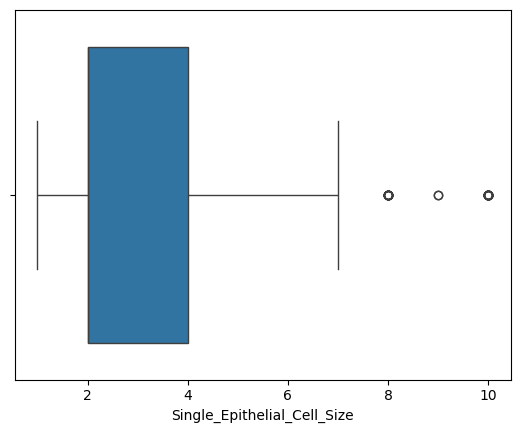

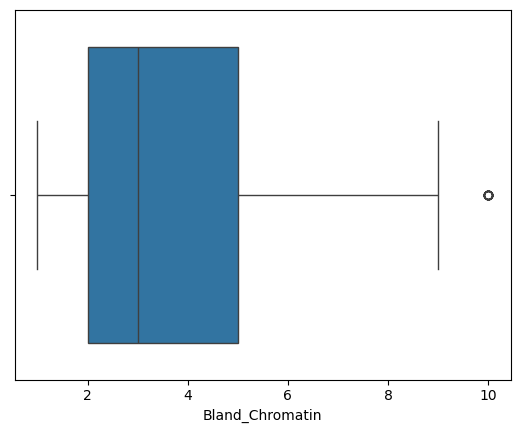

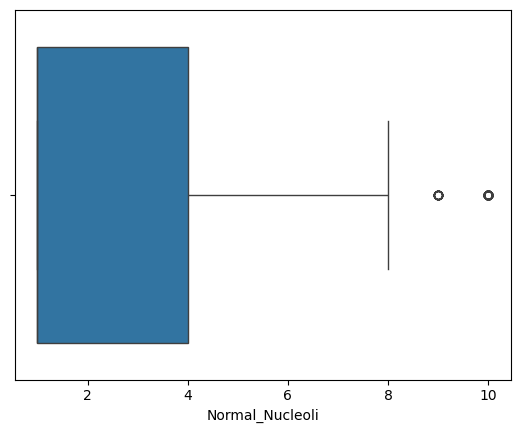

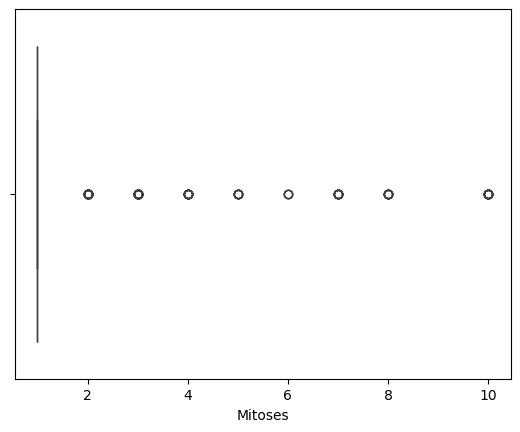

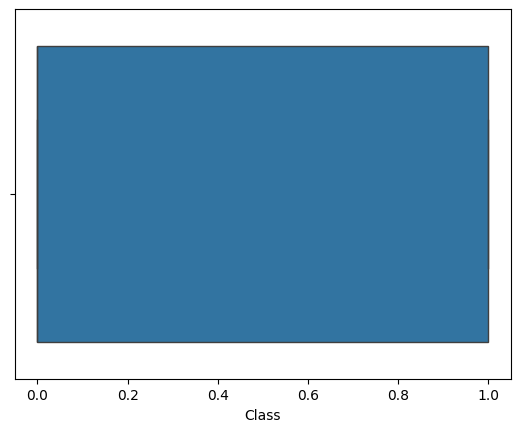

In [49]:
for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(data = df , x =i)
    plt.show()

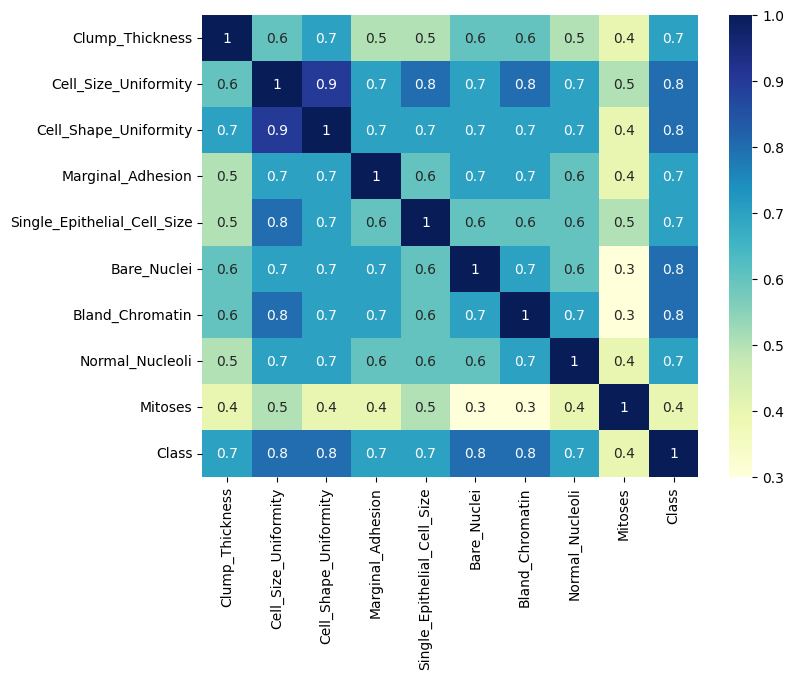

In [50]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr().round(1), annot=True, cmap='YlGnBu')
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [*] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [*] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [52]:
X = df.drop(columns = 'Class') #independent variables (features)
y = df['Class'] #dependent variable (target)

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
#split the data 80% training and 20% testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42,stratify=y)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
# Create a Base model
base_model = DecisionTreeClassifier(random_state=42)

In [57]:
# Train the Bagging Classifier
base_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
# Create a Bagging Classifier with Decision Trees as base classifiers
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,random_state=42)

In [59]:
# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [60]:
# Make predictions
y_pred_train = bagging_clf.predict(X_train)

In [61]:
# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [62]:
# Make predictions
y_pred_test = bagging_clf.predict(X_test)

In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9416


In [64]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , roc_curve, auc

In [65]:
y_score = base_model.predict_proba(X_test)[:, 1] 

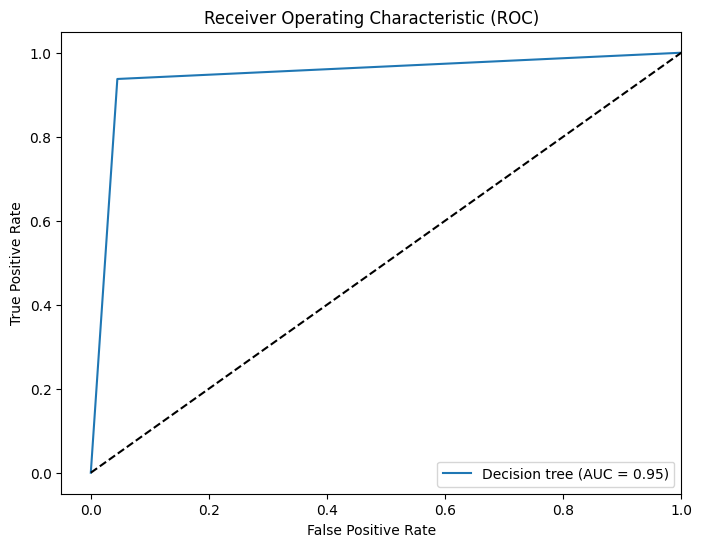

In [66]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8, 6])
plt.plot(fpr, tpr, label=f'Decision tree (AUC = {roc_auc:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [67]:
df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [69]:
# Prepare the dummy data point
new_data = pd.DataFrame({
    'Clump_Thickness': [7],
    'Cell_Size_Uniformity': [2],
    'Cell_Shape_Uniformity': [1],
    'Marginal_Adhesion': [5],
    'Single_Epithelial_Cell_Size': [2],
    'Bare_Nuclei': [4],
    'Bland_Chromatin': [3],
    'Normal_Nucleoli': [7],
    'Mitoses': [1]
})


# Make predictions
prediction = bagging_clf.predict(new_data)
probability = bagging_clf.predict_proba(new_data)

print(f"Prediction: {prediction[0]}")
print(f"Prediction Probability: {probability[0]}")

Prediction: 1
Prediction Probability: [0.46 0.54]




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



